<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/polviews_cleaned_connor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [2]:
df = pd.read_csv("./selected_gss_data.csv", low_memory = False)
import pandas as pd
df1 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet', engine='pyarrow')
df2 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet', engine='pyarrow')
df3 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet', engine='pyarrow')
df = pd.concat([df1, df2, df3])

In [3]:
df = pd.concat([df1, df2 ,df3], ignore_index = True )
df = df.loc[:,['polviews','age','relig','cappun'] ]
df.head()


,polviews,age,relig,cappun
0,NaN,23.0,jewish,NaN
1,NaN,70.0,catholic,NaN
2,NaN,48.0,protestant,NaN
3,NaN,27.0,other,NaN
4,NaN,61.0,protestant,NaN


In [12]:
import numpy as np

df['polviews'] = df['polviews'].replace(['not imputable_(2147483638)' ,
                       'not available in this year' ,
                       'not available in this release' ,
                       'uncodeable' ,
                       'skipped on web' ,
                       'refused' ,
                       "don't know" ,
                       'not imputable_(2147483637)' ,
                       'no answer' ,
                       'dk, na, iap' ,
                       "I don't have a job" ,
                       'iap' ,
                       'see codebook'], np.nan)
df['polviews'].value_counts()
df

,polviews,age,relig,cappun
0,NaN,23.0,jewish,NaN
1,NaN,70.0,catholic,NaN
2,NaN,48.0,protestant,NaN
3,NaN,27.0,other,NaN
4,NaN,61.0,protestant,NaN
...,...,...,...,...
72385,extremely liberal,22.0,other,oppose
72386,"moderate, middle of the road",29.0,catholic,favor
72387,slightly liberal,32.0,none,favor
72388,slightly liberal,49.0,none,oppose


<Axes: >

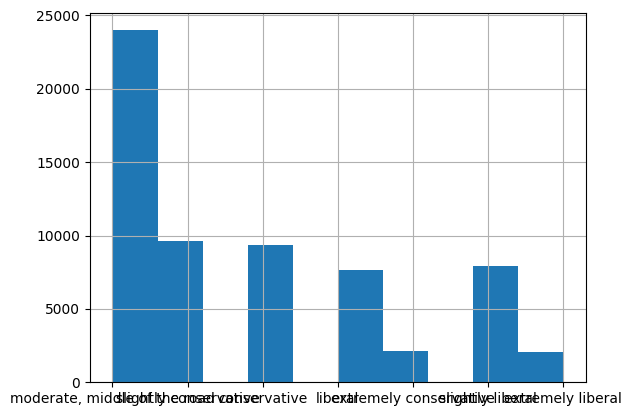

In [9]:
polviews.hist()

In [14]:
import numpy as np

df['cappun'] = df['cappun'].replace(['no answer',
                         'don\'t know',
                         'iap','refused',
                         'skipped on web',
                         'I don\'t have a job',
                         'dk, na, iap',
                         'not imputable_(2147483637)',
                         'not imputable_(2147483638)',
                         'uncodeable',
                         'not available in this release',
                         'not available in this year',
                         'see codebook'], np.nan)
df['cappun'].value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

,polviews,age,relig,cappun
0,NaN,23.0,jewish,NaN
1,NaN,70.0,catholic,NaN
2,NaN,48.0,protestant,NaN
3,NaN,27.0,other,NaN
4,NaN,61.0,protestant,NaN
...,...,...,...,...
72385,extremely liberal,22.0,other,oppose
72386,"moderate, middle of the road",29.0,catholic,favor
72387,slightly liberal,32.0,none,favor
72388,slightly liberal,49.0,none,oppose


<Axes: xlabel='polviews', ylabel='Count'>

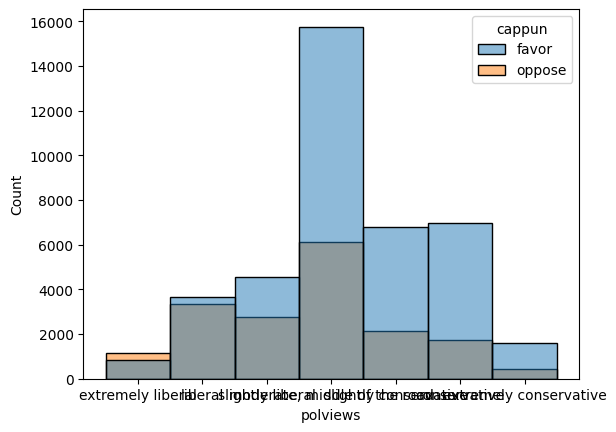

In [19]:
import seaborn as sns

sns.histplot(data=df, x=polviews, hue = cappun)

In [27]:
counts = df.groupby(['polviews','cappun'])['cappun'].count()
display(counts)

polviews                      cappun
extremely liberal             favor       820
                              oppose     1136
liberal                       favor      3661
                              oppose     3361
slightly liberal              favor      4551
                              oppose     2760
moderate, middle of the road  favor     15752
                              oppose     6132
slightly conservative         favor      6789
                              oppose     2125
conservative                  favor      6968
                              oppose     1733
extremely conservative        favor      1598
                              oppose      423
Name: cappun, dtype: int64

In [35]:
import matplotlib.pyplot as plt



KeyError: 'cappun'